In [3]:
import pandas as pd

In [4]:
# Read data
df = pd.read_csv("sample-orders.csv", encoding='ISO-8859-1', parse_dates=['order_date'])
df.head()

,order_date,order_id,customer,grand_total
0,2011-09-07,CA-2011-100006,Dennis Kane,378
1,2011-07-08,CA-2011-100090,Ed Braxton,699
2,2011-03-14,CA-2011-100293,Neil Franzsisch,91
3,2011-01-29,CA-2011-100328,Jasper Cacioppo,4
4,2011-04-08,CA-2011-100363,Jim Mitchum,21


In [7]:
df.dtypes

order_date     datetime64[ns]
order_id               object
customer               object
grand_total             int64
dtype: object

In [8]:
# some basic statistics of the data set
print(f"Total # transactions: {df.shape[0]}")
print(f"# Unique customers: {df['customer'].nunique()}")
print(f"Total transaction amount: ${df['grand_total'].sum()}")
print(f"Period covers: {min(df.order_date)} to {max(df.order_date)}")


Total # transactions: 5009
# Unique customers: 793
Total transaction amount: $2297261
Period covers: 2011-01-04 00:00:00 to 2014-12-31 00:00:00


In [9]:
df.describe(include='all')

,order_date,order_id,customer,grand_total
count,5009,5009,5009,5009.000000
unique,1238,5009,793,NaN
top,2013-09-06 00:00:00,CA-2014-152205,Emily Phan,NaN
freq,19,1,17,NaN
first,2011-01-04 00:00:00,NaN,NaN,NaN
last,2014-12-31 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,458.626672
std,NaN,NaN,NaN,954.729307
min,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,38.000000


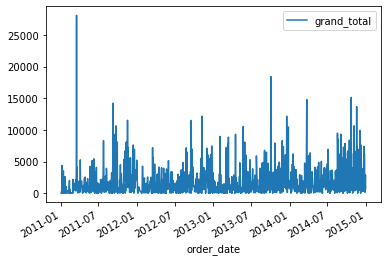

In [33]:
# basic plots

# transactions over time
df_trx = df.groupby('order_date').agg({'grand_total':sum})
df_trx.plot()

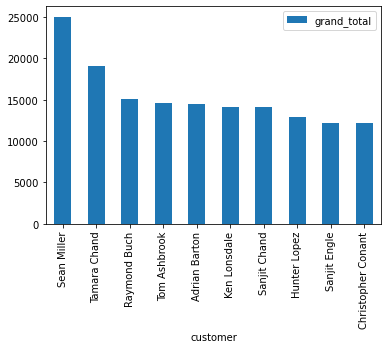

In [10]:
# Top 10 customers by value
df.groupby('customer').agg({'grand_total': sum}).nlargest(10, columns='grand_total').plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000910D3C8>]],
      dtype=object)

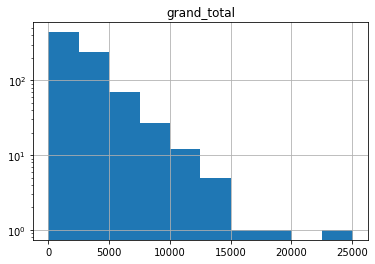

In [11]:
# Histogram of customer's order value
df.groupby('customer').agg({'grand_total': sum}).hist(bins=10, log=True)

In [12]:
# Compute R, F and M
# for each dimension, we divide customers into 4 quartiles
from datetime import timedelta
TODAY = max(df['order_date']) + timedelta(days=1)

df_customers = df.groupby('customer').agg(
    #min_order_date = ('order_date', min),
    #max_order_date = ('order_date', max),
    R = ("order_date", lambda x: (TODAY - max(x)).days),
    F = ("order_id", 'count'),
    M = ('grand_total', sum),
)
df_customers.head()

,R,F,M
customer,,,
Aaron Bergman,416,3,887
Aaron Hawkins,13,7,1744
Aaron Smayling,89,7,3050
Adam Bellavance,55,8,7756
Adam Hart,35,10,3249


In [13]:
df_customers.describe()

,R,F,M
count,793.000000,793.000000,793.000000
mean,147.805801,6.316520,2896.924338
std,186.231107,2.550885,2628.660490
min,1.000000,1.000000,5.000000
25%,31.000000,5.000000,1145.000000
50%,76.000000,6.000000,2257.000000
75%,184.000000,8.000000,3784.000000
max,1167.000000,17.000000,25042.000000


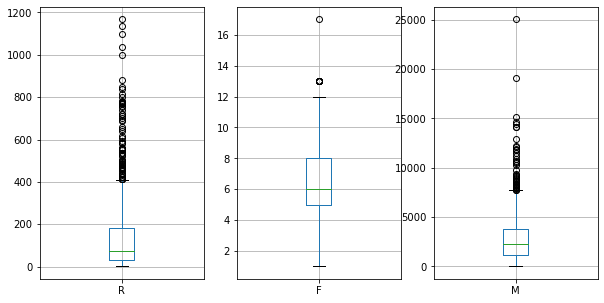

In [32]:
import matplotlib.pyplot as plt
# Plotting time
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
df_customers.boxplot('R',ax=ax[0])
df_customers.boxplot('F',ax=ax[1])
df_customers.boxplot('M',ax=ax[2])


In [20]:
print(df_customers['R'].quantile([0.25, 0.5, 0.75]))
print(df_customers['F'].quantile([0.25, 0.5, 0.75]))
print(df_customers['M'].quantile([0.25, 0.5, 0.75]))

0.25     31.0
0.50     76.0
0.75    184.0
Name: R, dtype: float64
0.25    5.0
0.50    6.0
0.75    8.0
Name: F, dtype: float64
0.25    1145.0
0.50    2257.0
0.75    3784.0
Name: M, dtype: float64


In [21]:
def label_quantile(val, quantiles):
    if val < quantiles[0]:
        return 1
    elif val < quantiles[1]:
        return 2
    elif val < quantiles[2]:
        return 3
    else:
        return 4

In [25]:
df_customers['R_score'] = df_customers['R'].apply(lambda x: label_quantile(x, df_customers['R'].quantile([0.25, 0.5, 0.75]).to_list()))
df_customers['F_score'] = df_customers['F'].apply(lambda x: label_quantile(x, df_customers['F'].quantile([0.25, 0.5, 0.75]).to_list()))
df_customers['M_score'] = df_customers['M'].apply(lambda x: label_quantile(x, df_customers['M'].quantile([0.25, 0.5, 0.75]).to_list()))

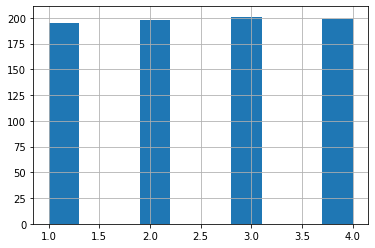

In [28]:
df_customers['R_score'].hist()

In [37]:
df_customers[['R_score', 'F_score', 'M_score']].sample(10)

,R_score,F_score,M_score
customer,,,
Randy Ferguson,4,4,3
David Bremer,2,3,3
Christine Kargatis,3,2,3
Beth Thompson,4,2,3
Aaron Bergman,4,1,1
Shirley Schmidt,4,1,1
Richard Bierner,1,4,3
Clay Rozendal,2,1,2
Cyra Reiten,3,1,2


In [34]:
df_customers.head(10)

,R,F,M,R_score,F_score,M_score
customer,,,,,,
Aaron Bergman,416,3,887,4,1,1
Aaron Hawkins,13,7,1744,1,3,2
Aaron Smayling,89,7,3050,3,3,3
Adam Bellavance,55,8,7756,2,4,4
Adam Hart,35,10,3249,2,4,3
Adam Shillingsburg,29,9,3256,1,4,3
Adrian Barton,42,10,14474,2,4,4
Adrian Hane,61,7,1734,2,3,2
Adrian Shami,42,2,59,2,1,1


In [36]:
df_customers.sort_values(by=['M_score', 'F_score', 'R_score'], ascending=[False, False, True]).head(10)

,R,F,M,R_score,F_score,M_score
customer,,,,,,
Alan Dominguez,30,8,6107,1,4,4
Alan Hwang,7,9,4806,1,4,4
Annie Thurman,14,10,3831,1,4,4
Arianne Irving,14,10,4376,1,4,4
Ben Ferrer,17,11,5907,1,4,4
Brenda Bowman,29,9,6766,1,4,4
Brosina Hoffman,24,8,6255,1,4,4
Chris Cortes,21,12,3913,1,4,4
Dan Reichenbach,4,9,6528,1,4,4
